# Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns

# Importing data 

In [2]:
missing_values = ['NONE', 'None', 'none', 'NAN', 'Nan', 'nan', 'NA', 'Na', 'na','Nan','NaN',' ']
df=pd.read_csv(r"C:\Users\Dell\Downloads\credit card.csv",na_values=missing_values)
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  float64
 3   EDUCATION                   30000 non-null  float64
 4   MARRIAGE                    30000 non-null  float64
 5   AGE                         30000 non-null  float64
 6   PAY_0                       30000 non-null  float64
 7   PAY_2                       30000 non-null  float64
 8   PAY_3                       30000 non-null  float64
 9   PAY_4                       30000 non-null  float64
 10  PAY_5                       30000 non-null  float64
 11  PAY_6                       30000 non-null  float64
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Droping null value

In [4]:
### WE HAVE DROPPED ALL THE NULL VALUES
df.dropna(inplace=True)
df = df.drop_duplicates()
df=df.drop("ID",axis=1)
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
df.size

720000

# Checking if data set is balanced or not 

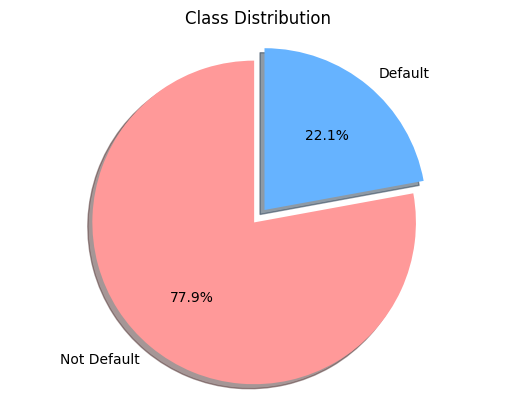

In [34]:
# Number of occurrences for each class
class_counts = df['default payment next month'].value_counts()

# Pie chart to visualize the class distribution
labels = ['Not Default', 'Default']
sizes = class_counts.values
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') 
plt.title('Class Distribution')
plt.show()

In [35]:
print(df.columns.tolist())

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


# HISTOGRAM

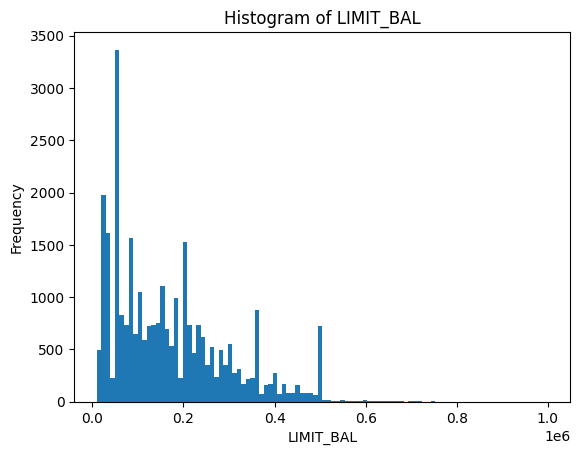

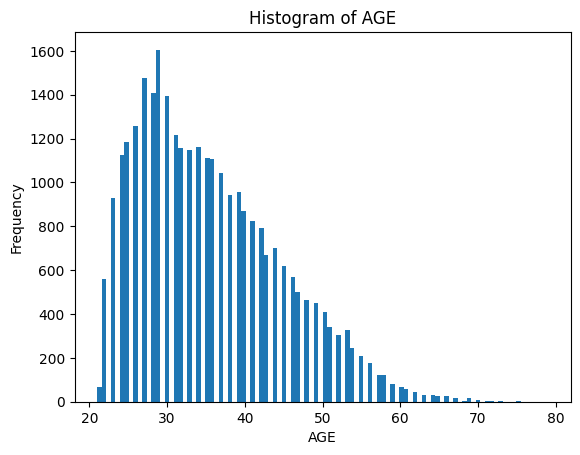

In [36]:
l=['LIMIT_BAL','AGE']
for column in l:
    if df[column].dtype != 'object':
        plt.hist(df[column], bins=100)  
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()

# PIE CHART

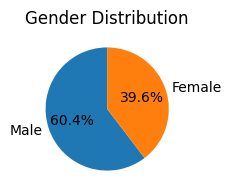

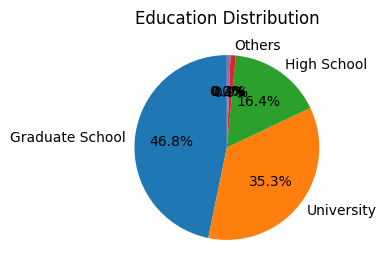

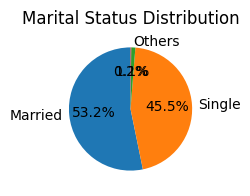

In [37]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in the Gender variable
gender_counts = df['SEX'].value_counts(dropna=False)

# Count the occurrences of each category in the Education variable
education_counts = df['EDUCATION'].value_counts(dropna=False)

# Count the occurrences of each category in the Marital Status variable
marital_status_counts = df['MARRIAGE'].value_counts(dropna=False)

# Pie chart for Gender
plt.figure(figsize=(2,2))
plt.pie(gender_counts,labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

# Pie chart for Education
plt.figure(figsize=(3,3))
plt.pie(education_counts, labels=['Graduate School', 'University', 'High School', 'Others',""," "," " ], autopct='%1.1f%%', startangle=90)
plt.title('Education Distribution')

# Pie chart for Marital Status
plt.figure(figsize=(2, 2))
plt.pie(marital_status_counts, labels=['Married', 'Single', 'Others'," "], autopct='%1.1f%%', startangle=90)
plt.title('Marital Status Distribution')
plt.show()


Label encoder

In [38]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
display(df)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000.0,1,2,1,3,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000.0,1,2,2,5,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000.0,1,2,2,13,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000.0,1,2,1,16,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000.0,0,2,1,36,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,0,3,1,18,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000.0,0,3,2,22,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000.0,0,2,2,16,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000.0,0,3,1,20,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


# OUTLIERS

<Axes: >

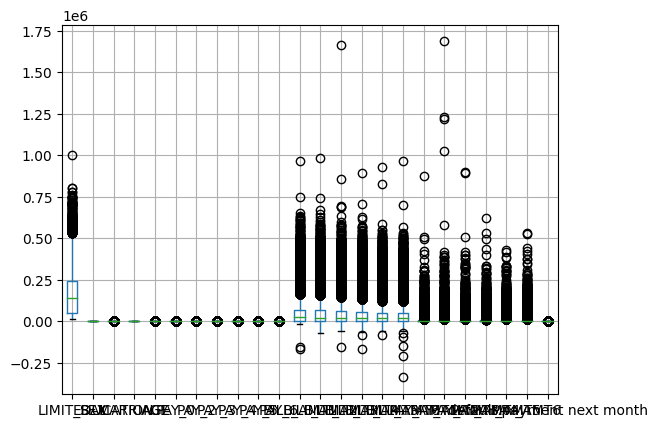

In [39]:
#BOX PLOT
df.boxplot()

In [40]:
# DATA CONTAINS OUTLIERS
# HANDLING OUTILERS USING INTER QUARTILE RANGE
#################################################
l= df.columns.tolist()
for i in l:
    Q1=np.percentile(df[i],10,interpolation = 'midpoint')
    Q3=np.percentile(df[i],90,interpolation = 'midpoint')
    IQR=Q3-Q1
    upper_limit=Q3+(1.5*IQR)
    lower_limit=Q1-(1.5*IQR)
    df=df[df[i]<=upper_limit]
    df=df[df[i]>=lower_limit]
warnings.filterwarnings("ignore")
#################################################
# REMOVED OUTLIERS USING IQR

# Trend of payement status

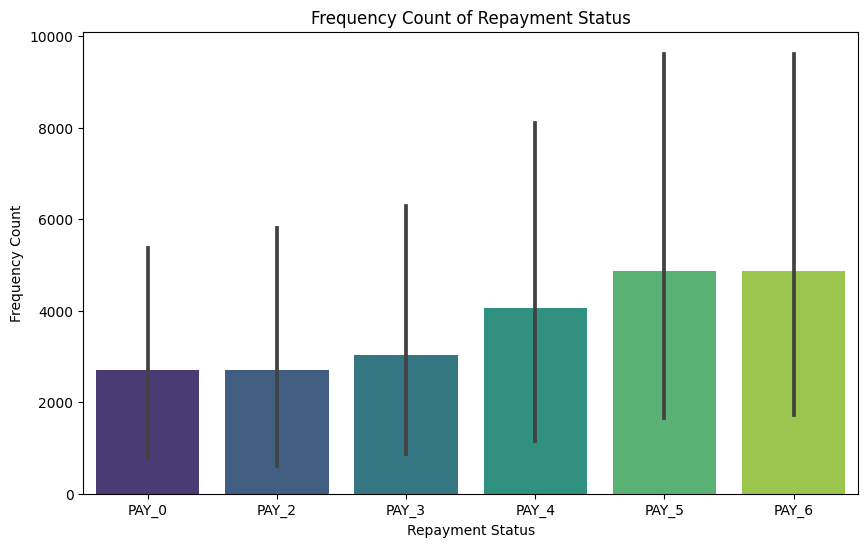

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the repayment status variables
repayment_status = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

# Calculate the frequency count for each repayment status category
repayment_counts = repayment_status.apply(pd.value_counts)

# Plot the frequency count
plt.figure(figsize=(10, 6))
sns.barplot(data=repayment_counts, palette='viridis')
plt.xlabel('Repayment Status')
plt.ylabel('Frequency Count')
plt.title('Frequency Count of Repayment Status')
plt.show()

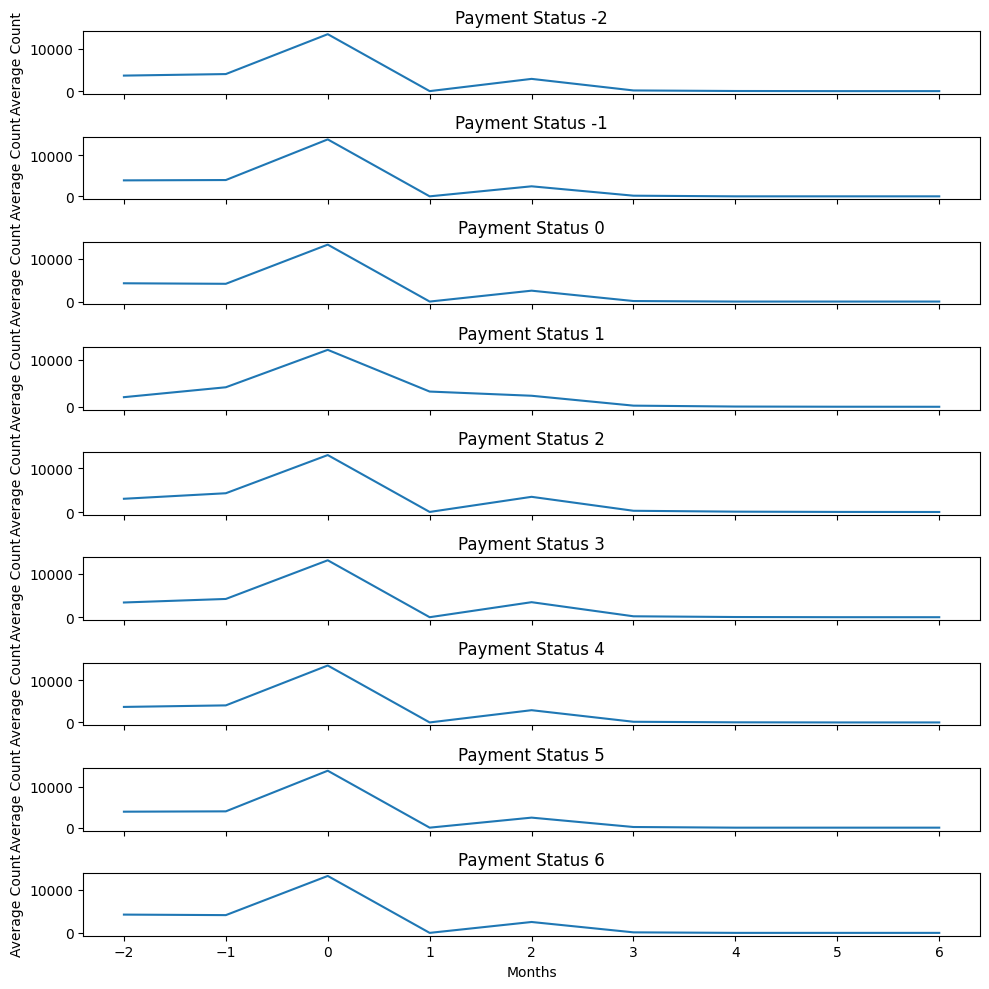

In [42]:
repayment_status = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
# Calculate the average count of each payment status for each month
average_counts = repayment_status.apply(pd.Series.value_counts).fillna(0)
payment_statuses = range(-2,7)  # Payment status values (-1 to 9)
num_statuses = len(payment_statuses)
fig, axs = plt.subplots(num_statuses, 1, figsize=(10, 10), sharex=True)
for i, status in enumerate(payment_statuses):
    axs[i].plot(average_counts.index, average_counts.iloc[:, i-3])
    axs[i].set_ylabel('Average Count')
    axs[i].set_title(f'Payment Status {status}')
    axs[i].set_xticks(average_counts.index)
plt.xlabel('Months')
plt.tight_layout()
plt.show()


# LOGISTIC REGRESSION

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(penalty='l2')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.758273381294964


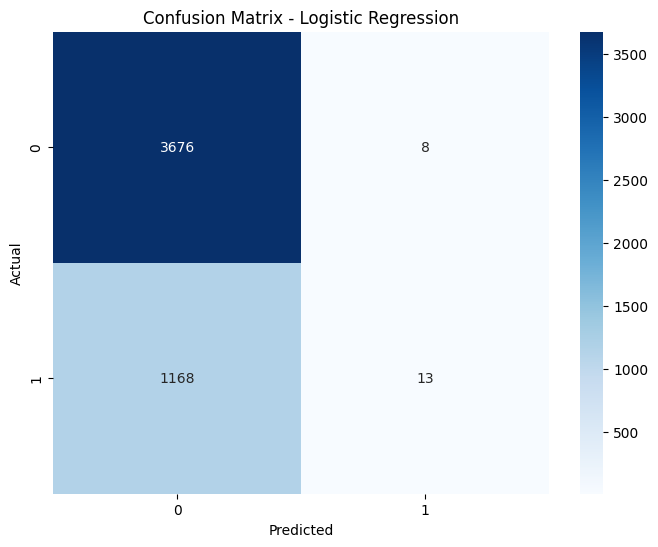

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# LDA 

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

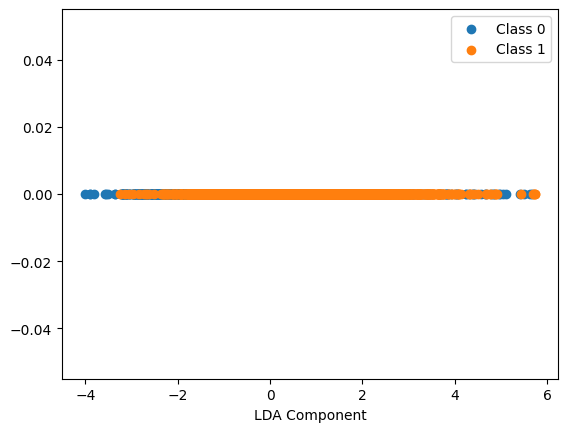

In [46]:
plt.scatter(X_lda[y == 0], np.zeros_like(X_lda[y == 0]), label='Class 0')
plt.scatter(X_lda[y == 1], np.zeros_like(X_lda[y == 1]), label='Class 1')
plt.xlabel('LDA Component')
plt.legend()
plt.show()


# Resampling

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
unique_classes, class_counts = np.unique(y_train_resampled, return_counts=True)
print("Class Distribution after SMOTE:")
for cls, count in zip(unique_classes, class_counts):
    print("Class {}: {}".format(cls, count))


Class Distribution after SMOTE:
Class 0.0: 14866
Class 1.0: 14866


# Heat map

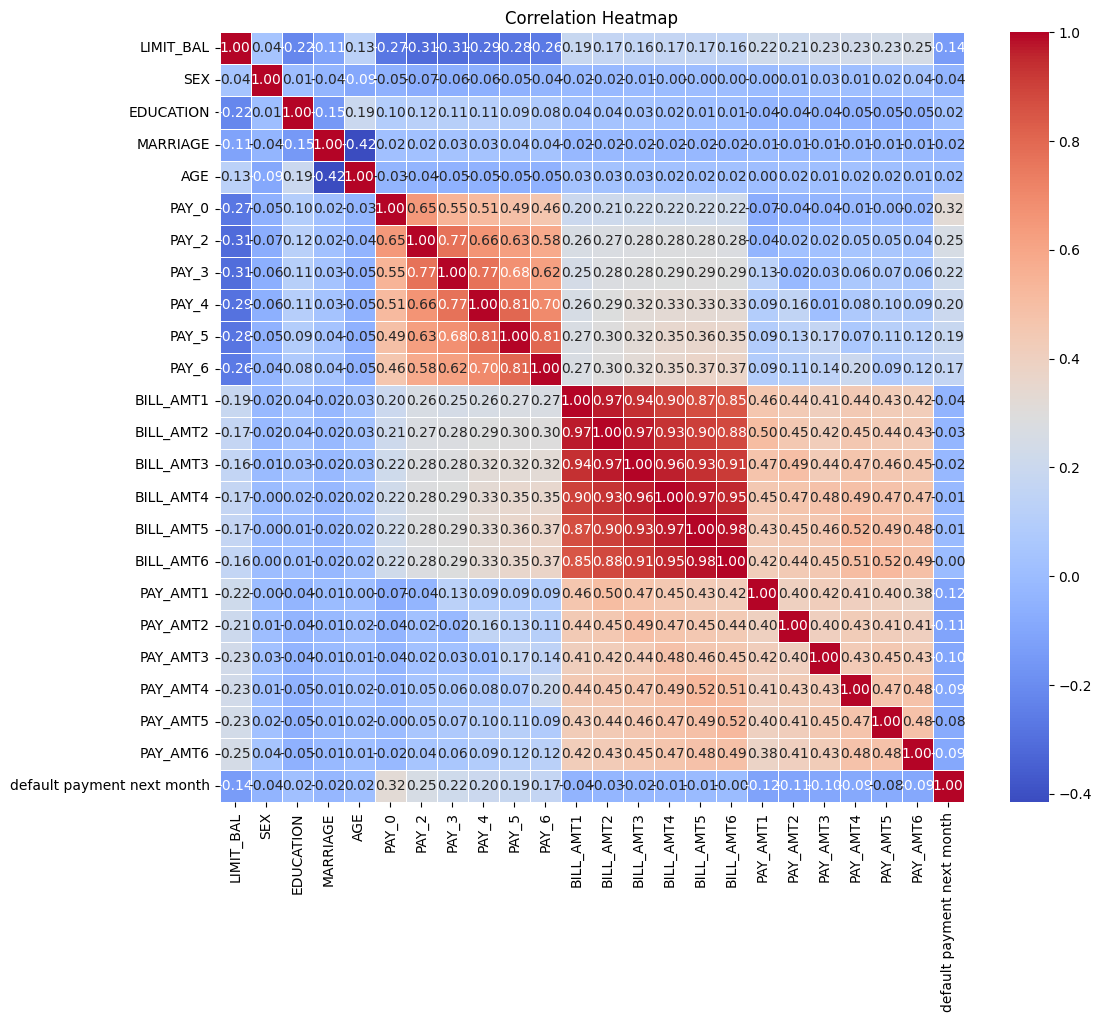

In [48]:
corr=df.corr()
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Bill and pay are highly correlated among themself , so we will take last one only(most recent one)

In [49]:
df=df.drop((["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","BILL_AMT5","BILL_AMT4","BILL_AMT1","BILL_AMT2","BILL_AMT3"]),axis=1)

In [50]:
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

In [53]:
X_train_resampled, y_train_resampled
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled,y_train_resampled, test_size=0.2, random_state=42)

In [54]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],),
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=1024, verbose=1, validation_data=(X_test, y_test))

y_pred = (model.predict(X_test) > 0.47).astype(int)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Epoch 1/100
24/24 [==============================] - 3s 19ms/step - loss: 1.0075 - accuracy: 0.5459 - val_loss: 0.8743 - val_accuracy: 0.6116
Epoch 2/100
24/24 [==============================] - 0s 12ms/step - loss: 0.8974 - accuracy: 0.6153 - val_loss: 0.8354 - val_accuracy: 0.6872
Epoch 3/100
24/24 [==============================] - 0s 12ms/step - loss: 0.8506 - accuracy: 0.6526 - val_loss: 0.8013 - val_accuracy: 0.6955
Epoch 4/100
24/24 [==============================] - 0s 12ms/step - loss: 0.8147 - accuracy: 0.6784 - val_loss: 0.7762 - val_accuracy: 0.7057
Epoch 5/100
24/24 [==============================] - 0s 11ms/step - loss: 0.7970 - accuracy: 0.6898 - val_loss: 0.7549 - val_accuracy: 0.7135
Epoch 6/100
24/24 [==============================] - 0s 13ms/step - loss: 0.7767 - accuracy: 0.7050 - val_loss: 0.7373 - val_accuracy: 0.7274
Epoch 7/100
24/24 [==============================] - 0s 10ms/step - loss: 0.7619 - accuracy: 0.7070 - val_loss: 0.7194 - val_accuracy: 0.7342
Epoch 

# Hypothesis testing

 1. checking if ,  The average credit limit is significantly different between male and female clients.

In [59]:
from scipy.stats import mannwhitneyu

# Separate the credit limit data for male and female clients
male_credit_limit = df[df['SEX'] == 0]['LIMIT_BAL']
female_credit_limit = df[df['SEX'] ==1]['LIMIT_BAL']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(male_credit_limit, female_credit_limit, alternative='two-sided')

# Print the test statistic and p-value
print("Test Statistic:", statistic)
print("P-Value:", p_value)

# Determine the significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The average credit limit is significantly different between male and female clients.")
else:
    print("There is no significant difference in the average credit limit between male and female clients.")


Test Statistic: 64332673.5
P-Value: 2.130651384100114e-32
The average credit limit is significantly different between male and female clients.


2. If male and female ,is diffrent on default payment next month (pie chart)

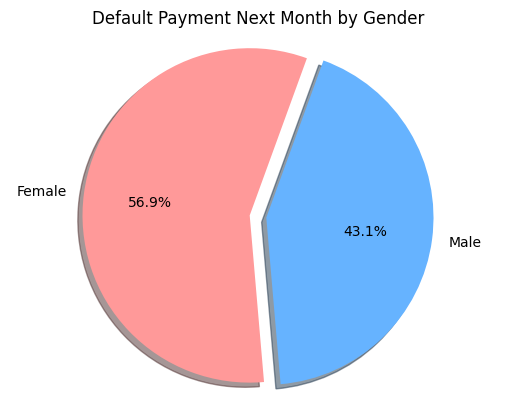

In [63]:
import matplotlib.pyplot as plt

# Calculate the count of default payment next month for each gender
count_default = df[df['default payment next month'] == 1]['SEX'].value_counts()

# Plot the pie chart
labels = ['Female', 'Male']
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode the first slice
plt.pie(count_default, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=70)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Default Payment Next Month by Gender')
plt.show()


2. Test of proportion

In [60]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['SEX'], df['default payment next month'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square Statistic:", chi2_stat)
print("P-Value:", p_value)
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant difference in default payment between male and female clients.")
else:
    print("There is no significant difference in default payment between male and female clients.")


Chi-square Statistic: 41.30778630864308
P-Value: 1.3004982945476198e-10
There is a significant difference in default payment between male and female clients.
